# dTm_binary_classification

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('../src/dTm_bin_train.csv')
df_test = pd.read_csv('../src/dTm_bin_test.csv')
df_train.head(5)

,SecStr,ASA_pct,dMW,dChg,dARM,dHydro,dVdwV,dSASA,totalE,dTmC
0,3,35.07,-85,-1.0,0.0,0.616,-81,-129,0.152,unstable
1,1,8.34,-85,-1.0,0.0,0.616,-81,-129,0.204,unstable
2,2,26.22,-72,1.0,0.0,0.458,-61,-128,1.358,unstable
3,4,66.74,-26,0.0,0.0,-0.095,-23,-38,0.927,unstable
4,1,0.25,-74,0.0,0.0,-0.237,-76,-150,4.900,unstable


In [3]:
def return_array(df:pd.DataFrame):
    X = df.iloc[:,0:len(df.columns)-1]
    y = pd.get_dummies(df['dTmC'])
    y = y['stable']
    return X,y

In [4]:
X_train, y_train = return_array(df_train)
X_test, y_test = return_array(df_test)

# Correlation

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

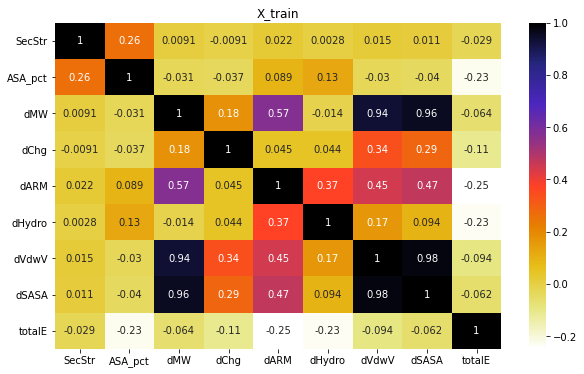

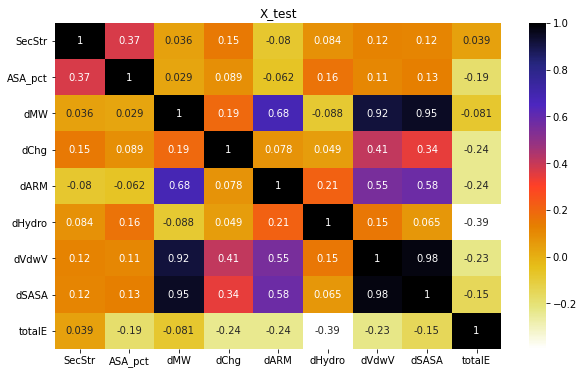

In [6]:
plt.figure(figsize=(10,6))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("X_train")
plt.show()

# delta_VdwV and delta_MW are correlated
# delta_SASA and delta_MW are correlated
# delta_SASA and delta_VdwV are correlated


plt.figure(figsize=(10,6))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("X_test")
plt.show()


# delta_VdwV and delta_MW are correlated
# delta_SASA and delta_MW are correlated
# delta_SASA and delta_VdwV are correlated

# Support Vector Machine

In [7]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
import numpy as np
model = []
cv_accuracy = []
test_accuracy = []

# best params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

clf = SVC(C=10,gamma='scale',kernel='rbf')

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.7919056429232192


In [8]:
from sklearn.metrics import classification_report, accuracy_score
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("SVC")

              precision    recall  f1-score   support

           0       0.76      0.95      0.85        82
           1       0.69      0.27      0.39        33

    accuracy                           0.76       115
   macro avg       0.73      0.61      0.62       115
weighted avg       0.74      0.76      0.72       115

0.7565217391304347


# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.8288159111933394


In [10]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("RF")

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        82
           1       0.78      0.55      0.64        33

    accuracy                           0.83       115
   macro avg       0.81      0.74      0.76       115
weighted avg       0.82      0.83      0.82       115

0.8260869565217391


# Naive-Bayes Classifier

In [11]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.7507400555041628


In [12]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("NB")

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        82
           1       0.50      0.39      0.44        33

    accuracy                           0.71       115
   macro avg       0.64      0.62      0.62       115
weighted avg       0.70      0.71      0.70       115

0.7130434782608696


# KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.7527289546716004


In [14]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("KNN")

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        82
           1       0.55      0.36      0.44        33

    accuracy                           0.73       115
   macro avg       0.66      0.62      0.63       115
weighted avg       0.71      0.73      0.71       115

0.7304347826086957


#  Artificial Neural Network

In [15]:
from sklearn.neural_network import MLPClassifier

# best params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}  

clf = MLPClassifier(activation='tanh',alpha=0.0001,hidden_layer_sizes=(100,),learning_rate='adaptive',solver='adam',max_iter=3000)
clf.fit(X_train, y_train.values.ravel())

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.8265494912118407


In [16]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("ANN")

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        82
           1       0.68      0.52      0.59        33

    accuracy                           0.79       115
   macro avg       0.75      0.71      0.72       115
weighted avg       0.78      0.79      0.78       115

0.7913043478260869


# Overall

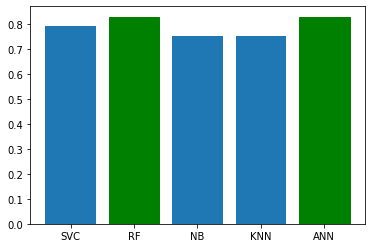

In [18]:
bar_list = plt.bar(model,cv_accuracy)
bar_list[1].set_color('green')
bar_list[4].set_color('green')